# linear regression
we will start with 1-d linear regression as simple first data science. linear regression helps when we have a reason to believe that two variables are related with a *linear* relationship, i.e. the dependent variable, `y`, is a multiple `b` of the independent variable plus/minus some constant, `a`:
\begin{equation}
    y = a + bx
\end{equation}
where we have some $n$ observations of $(x_i,y_i)_{obs}, i \in [1,...,n]$ pairs and are interested in determining the best estimates of the coefficients $a$, $b$.

later we will see that we can use the same mechanism to just as easily handle *multi-variate* linear regression where a dependent variable is a linear function of multiple independent variables.
\begin{equation}
    y = a + b_1 x_1+ b_2 x_2 + \ldots + b_k x_k
\end{equation}
in that case we are estimating the set of coefficients $a$ and $b_j, j \in [1,...,k]$, where:


# this week's exercise
this week's exercise will be to read in a data file `exercise_data.csv`. it consists of three columns `x`, `y1`, and `y2`. plot the scatter points (`x`,`y1`), and compute a best fit line through the point cloud. plot the best fit line. give your best guess to the linear model parameters that generated the data set. repeat with the data set (`x`, `y2`). 


# today's lesson
in this notebook we will see how to simulate a scatter point dataset, plot it, discover the best straight line fit through the point cloud, plot the fit, and then examine the residuals.

In [1]:
import numpy as np
import pandas as pd
from plotly import __version__ as plotly_version
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)         # initiate notebook for offline plot
# alternate plot routines...
import matplotlib.pyplot as plt
%matplotlib inline

# fitting routines
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# choose the 'true' model parameters:
slope = -3.14159
intercept = 31.41592

In [3]:
# generate a synthetic data set
num_points = 300  # number of synthetic data points
seed = 1             #  set seed for random number generation 
np.random.seed(seed) # (this allows for reproducability)

# uniform random draw a set of independent variable values
x = np.random.rand(num_points)
# compute the true values of the dependent variable
y_true = slope*x + intercept
# normally distributed random noise signal:
noise_signal = np.random.normal(loc=0.0, scale=1, size=num_points)
# the set of observed values have a noise component 
y_obs = np.add(y_true, noise_signal)

In [4]:
# arrange in a data frame for convenience
df = pd.DataFrame(data = {'x':x, 'y_true':y_true, 'y_obs':y_obs})

In [5]:
# take a look at the scatter
layout = {
    'title': 'true versus observed',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'dependent variable, y',
        #'range': [min_y, max_y]
        },
    'showlegend': False
}

figure = {
    'data': [
        {
            'name': "observed datapoints",
            'mode': 'markers',
            'x': df.x,
            'y': df.y_obs,
            'line': {'color': "rgb(150, 150, 150)"}
        },
        {
            'name': "true relationship",
            'mode': 'lines',
            'x': df.x,
            'y': df.y_true,
            'line': {'color': "rgb(0, 0, 255)",
                     'width': 3}
        },
    ],
    'layout': layout
}

iplot(figure)

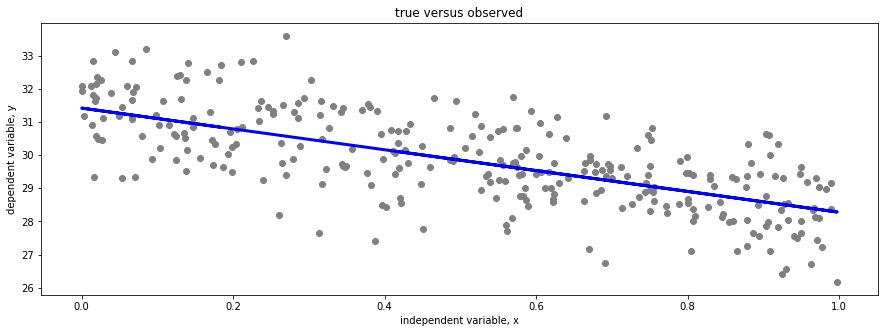

In [6]:
# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df.x, df.y_obs,  color='gray')
plt.plot(df.x, df.y_true, color='blue', linewidth=3)
plt.title('true versus observed')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');

# split full data into training and testing data sets

In [7]:
test_ratio = 3 # hold back a third of the data set for test
num_testing = int(num_points/test_ratio) # number of training points
num_training = num_points - num_testing
print('splitting initial data into two:', num_training, 'training points and', num_testing, 'test points')
df_training = df.head(num_training) 
df_testing = df.tail(num_testing)

splitting initial data into two: 200 training points and 100 test points


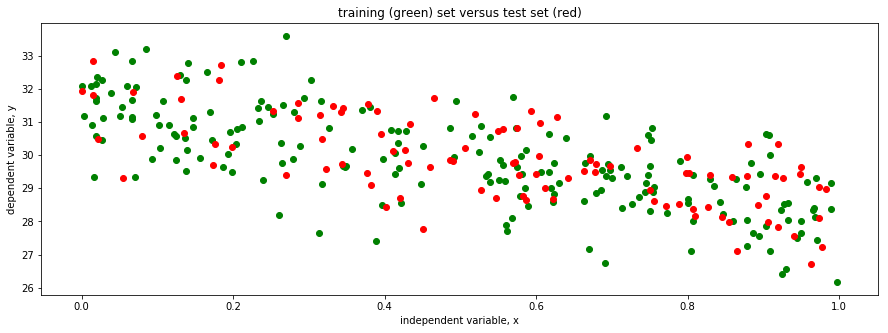

In [8]:
# take a look at the scatter
layout = {
    'title': 'training (green) set versus test set (red)',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'dependent variable, y',
        #'range': [min_y, max_y]
        },
    'showlegend': True
}

figure = {
    'data': [
        {
            'name': "training",
            'mode': 'markers',
            'x': df_training.x,
            'y': df_training.y_obs,
            'line': {'color': "rgb(0, 125, 0)"}
        },
        {
            'name': "testing",
            'mode': 'markers',
            'x': df_testing.x,
            'y': df_testing.y_obs,
            'line': {'color': "rgb(255, 0, 0)"}
        },

#         {
#             'name': "true line",
#             'mode': 'lines',
#             'x': df.x,
#             'y': df.y_true,
#             'line': {'color': "rgb(0, 128, 0)",
#                      'width': 3}
#         },
    ],
    'layout': layout
}

iplot(figure)
# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df_training.x, df_training.y_obs,  color='green')
plt.scatter(df_testing.x, df_testing.y_obs,  color='red')
plt.title('training (green) set versus test set (red)')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');

#  use `sklearn` methods to fit the model
we will use the `sklearn` module to fit the linear model. this is done in steps. you can follow the [documentation here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).
1. first we create a model object, in this case a `LinearRegression` model object from the `linear_model` module. (note that the optional parameter `fit_intercept` is set to `True`, but that is the default anyway so you do not need to specify it.)

2. then we convert the dataframe columns into a numpy array format that `sklearn` anticipates (the independent variables must be have the shape `(n_samples, n_features)` and the dependent variable must have shape `(n_samples, n_targets)`. here `n_features=1` and `n_target=1`.

3. we then call on the `fit()` method in the `LinearRegression` linear model object and passing in the numpy arrays containing `x` and the `y_obs` values. this produces a `line_fit`

In [9]:
# create a new linear regression object
regression_model = linear_model.LinearRegression(fit_intercept=True,)
# we need to prep the data set for 
numpy_array_x = np.array(df_training.x).reshape(-1,1)
numpy_array_y = np.array(df_training.y_obs).reshape(-1,1)

# use the fit method of regression object to fit the training set
line_fit  = regression_model.fit(numpy_array_x, numpy_array_y)

# inspect the fit
what does the fit predict that the `slope` and `intercept` to be?

In [10]:
estimated_slope = line_fit.coef_[0][0]
estimated_intercept = regression_model.intercept_[0]
print('the estimated slope of the line is', 
      estimated_slope, 
      'and the difference from the true value is', 
      slope - estimated_slope, 
      '(', (slope - estimated_slope)/slope*100, '%)')
print('the estimated intercept of the line is', 
      estimated_intercept, 
      'and the difference from the true value is', 
      intercept - estimated_intercept, 
      '(', (intercept - estimated_intercept)/intercept*100, '%)')

the estimated slope of the line is -3.4286539490386363 and the difference from the true value is 0.2870639490386364 ( -9.137537012743115 %)
the estimated intercept of the line is 31.538329634462805 and the difference from the true value is -0.12240963446280517 ( -0.3896420491992759 %)


# apply model to the test data set

In [11]:
numpy_array_x_test = np.array(df_testing.x).reshape(-1,1)
y_predict_test = regression_model.predict(numpy_array_x_test)
# update the testing data frame
df_testing = df_testing.assign(predicted=pd.Series([value[0] for value in y_predict_test]).values)
df_testing = df_testing.assign(residuals=(df_testing.y_obs - df_testing.predicted).values)

In [12]:
df_testing

,x,y_true,y_obs,predicted,residuals
200,0.950176,28.430856,29.639313,28.280505,1.358808
201,0.556653,29.667144,30.782846,29.629758,1.153087
202,0.915606,28.539460,29.380322,28.399032,0.981289
203,0.641566,29.400382,29.297495,29.338621,-0.041126
204,0.390008,30.190676,31.337576,30.201128,1.136448
205,0.485991,29.889137,29.839434,29.872036,-0.032602
206,0.604310,29.517424,29.984067,29.466358,0.517709
207,0.549548,29.689466,30.723153,29.654120,1.069033
208,0.926181,28.506238,29.315082,28.362774,0.952308
209,0.918733,28.529636,30.319391,28.388311,1.931080


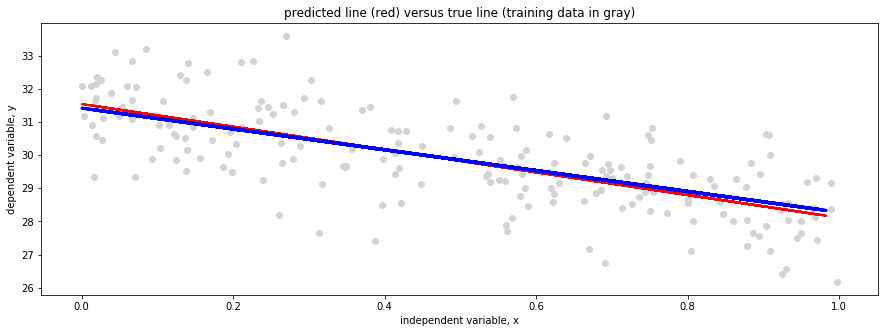

In [13]:
# plot command
plt.figure(figsize=(15,5))
plt.scatter(df_training.x, df_training.y_obs,  color='lightgray')
#plt.scatter(df_testing.x, df_testing.y_obs,  color='lightgray')
plt.plot(df_testing.x, y_predict_test,  color='red', linewidth=2)
plt.plot(df_testing.x, df_testing.y_true, color='blue', linewidth=3)
plt.title('predicted line (red) versus true line (training data in gray)')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');

# a warning!
look at the graphs below. 
![quartet of pathology](quartet_of_pathology.png)
blindly applying linear regression to these four graphs yields the same coefficients and intercept. but the datasets clearly show very different relationships between the independent and dependent variables. we therefore need to do more than just calculate a fit. we have to somehow make sure we are not treating as linear something that is not. plotting the data helps, and should always be done, but we also need to:
- consider the mean square error (how large is it?)
- consider the R^2 metric (is there another significant source of variance?)
- calculate and plot residuals (are they evenly spread out?)

# evaluate the model

AttributeError: 'DataFrame' object has no attribute 'y_obs'

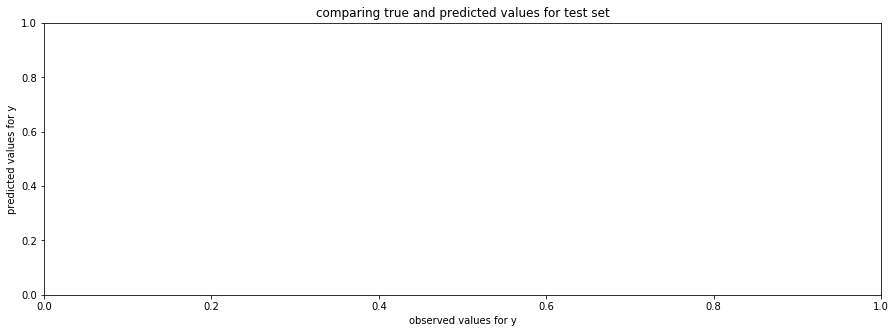

In [26]:
plt.figure(figsize=(15,5))
plt.title('comparing true and predicted values for test set')
plt.xlabel('observed values for y')
plt.ylabel('predicted values for y')
plt.scatter(df_testing.y_obs, y_predict_test, color='red')
plt.plot(df_testing.y_obs, df_testing.y_obs, color='gray', linewidth=1);

In [15]:
numpy_array_y_test = np.array(df_testing.y_obs).reshape(-1,1)
print("mean squared error: %.2f" % mean_squared_error(numpy_array_y_test, y_predict_test))
# ratio of variance explained by model (variance score): 1 is perfect prediction
print('variance score: %.2f' % r2_score(numpy_array_y_test, y_predict_test))

mean squared error: 0.92
variance score: 0.45


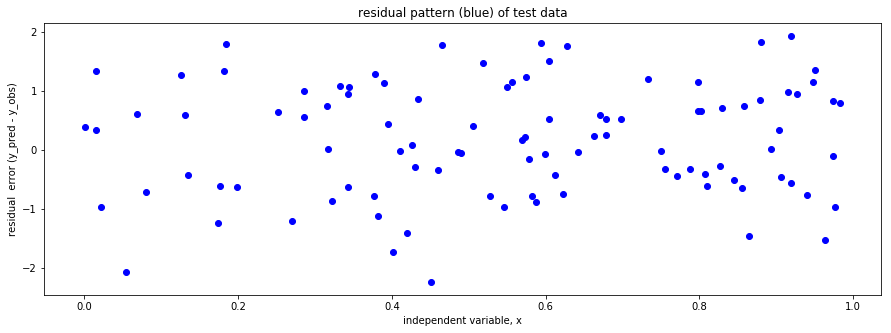

In [16]:
# take a look at the residuals scatter. is there a pattern here? is the noise truly random or systemic?
layout = {
    'title': 'residual pattern (blue) of test data',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'residual  error (y_pred - y_obs)',
        #'range': [min_y, max_y]
        },
    'showlegend': False
}

figure = {
    'data': [
        {
            'name': "residuals",
            'mode': 'markers',
            'x': df_testing.x,
            'y': df_testing.residuals,
            'line': {'color': "rgb(0, 0, 255)"}
        },
    ],
    'layout': layout
}
iplot(figure)

# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df_testing.x, df_testing.residuals, color='blue')
plt.title('residual pattern (blue) of test data')
plt.xlabel('independent variable, x')
plt.ylabel('residual  error (y_pred - y_obs)');

# try again with a different noise signal:

splitting initial data into two: 200 training points and 100 test points
the estimated slope of the line is -2.3898654331156752 and the difference from the true value is -0.7517245668843247 ( 23.928156343899897 %)
the estimated intercept of the line is 31.26793272887403 and the difference from the true value is 0.1479872711259702 ( 0.4710582122884519 %)
mean squared error: 0.10
variance score: 0.77


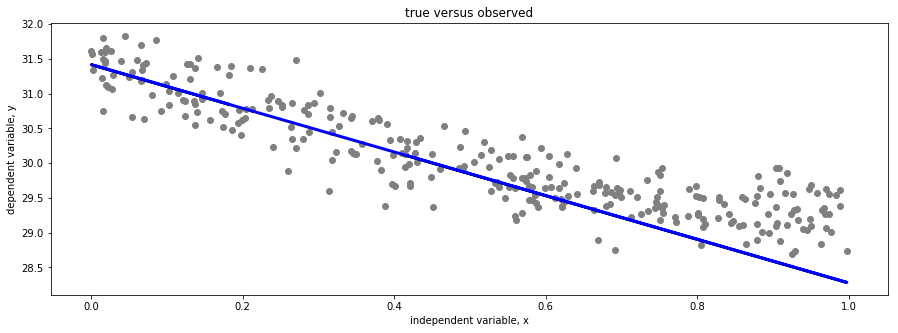

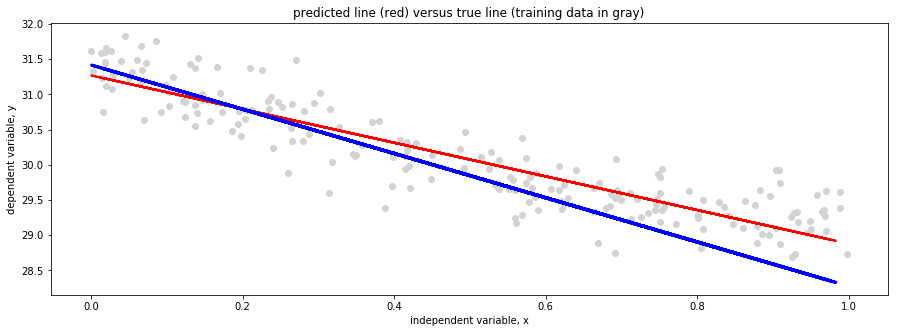

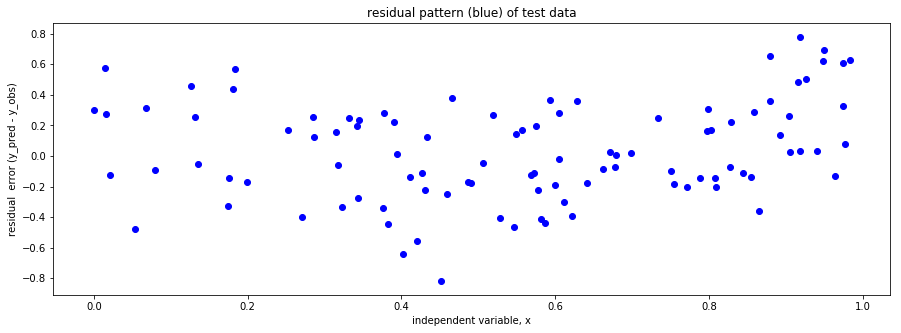

In [17]:
# choose the 'true' model parameters:
slope = -3.14159
intercept = 31.41592
# generate a synthetic data set
num_points = 300  # number of synthetic data points
seed = 1             #  set seed for random number generation 
np.random.seed(seed) # (this allows for reproducability)

# uniform random draw a set of independent variable values
#x = np.random.rand(num_points,1).reshape(-1,1)
x = np.random.rand(num_points)
# compute the true values of the dependent variable
y_true = slope*x + intercept
# a new, correlated noise signal (with a nonlinear dependency on x):
noise_signal = np.add(1.1*x**4, np.random.normal(loc=0.0, scale=0.3, size=num_points)) # <------------- NB! difference!
# the set of observed values have a noise component 
y_obs = np.add(y_true, noise_signal)

df = pd.DataFrame(data = {'x':x, 'y_true':y_true, 'y_obs':y_obs})
# take a look at the scatter
layout = {
    'title': 'true versus observed',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'dependent variable, y',
        #'range': [min_y, max_y]
        },
    'showlegend': True
}

figure = {
    'data': [
        {
            'name': "observed datapoints",
            'mode': 'markers',
            'x': df.x,
            'y': df.y_obs,
            'line': {'color': "rgb(150, 150, 150)"}
        },
        {
            'name': "true line",
            'mode': 'lines',
            'x': df.x,
            'y': df.y_true,
            'line': {'color': "rgb(0, 0, 255)",
                     'width': 3}
        },
    ],
    'layout': layout
}

iplot(figure)

# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df.x, df.y_obs,  color='gray')
plt.plot(df.x, df.y_true, color='blue', linewidth=3)
plt.title('true versus observed')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');
test_ratio = 3 # hold back a third of the data set for test
num_testing = int(num_points/test_ratio) # number of training points
num_training = num_points - num_testing
print('splitting initial data into two:', num_training, 'training points and', num_testing, 'test points')
df_training = df.head(num_training) 
df_testing = df.tail(num_testing)
# create a new linear regression object
regression_model = linear_model.LinearRegression(fit_intercept=True,)
# we need to prep the data set for 
numpy_array_x = np.array(df_training.x).reshape(-1,1)
numpy_array_y = np.array(df_training.y_obs).reshape(-1,1)

# use the fit method of regression object to fit the training set
line_fit  = regression_model.fit(numpy_array_x, numpy_array_y)
estimated_slope = line_fit.coef_[0][0]
estimated_intercept = regression_model.intercept_[0]
print('the estimated slope of the line is', 
      estimated_slope, 
      'and the difference from the true value is', 
      slope - estimated_slope, 
      '(', (slope - estimated_slope)/slope*100, '%)')
print('the estimated intercept of the line is', 
      estimated_intercept, 
      'and the difference from the true value is', 
      intercept - estimated_intercept, 
      '(', (intercept - estimated_intercept)/intercept*100, '%)')
numpy_array_x_test = np.array(df_testing.x).reshape(-1,1)
y_predict_test = regression_model.predict(numpy_array_x_test)
# update the testing data frame
df_testing = df_testing.assign(predicted=pd.Series([value[0] for value in y_predict_test]).values)
df_testing = df_testing.assign(residuals=(df_testing.y_obs - df_testing.predicted).values)
# plot command
plt.figure(figsize=(15,5))
plt.scatter(df_training.x, df_training.y_obs,  color='lightgray')
#plt.scatter(df_testing.x, df_testing.y_obs,  color='lightgray')
plt.plot(df_testing.x, y_predict_test,  color='red', linewidth=2)
plt.plot(df_testing.x, df_testing.y_true, color='blue', linewidth=3)
plt.title('predicted line (red) versus true line (training data in gray)')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');

numpy_array_y_test = np.array(df_testing.y_obs).reshape(-1,1)
print("mean squared error: %.2f" % mean_squared_error(numpy_array_y_test, y_predict_test))
# ratio of variance explained by model (variance score): 1 is perfect prediction
print('variance score: %.2f' % r2_score(numpy_array_y_test, y_predict_test))
# take a look at the residuals scatter. is there a pattern here? is the noise truly random or systemic?
layout = {
    'title': 'residual pattern (blue) of test data',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'residual  error (y_pred - y_obs)',
        #'range': [min_y, max_y]
        },
    'showlegend': False
}

figure = {
    'data': [
        {
            'name': "residuals",
            'mode': 'markers',
            'x': df_testing.x,
            'y': df_testing.residuals,
            'line': {'color': "rgb(0, 0, 255)"}
        },
    ],
    'layout': layout
}
iplot(figure)

# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df_testing.x, df_testing.residuals, color='blue')
plt.title('residual pattern (blue) of test data')
plt.xlabel('independent variable, x')
plt.ylabel('residual  error (y_pred - y_obs)');

# try again with a different undelying functional relationship

In [18]:
x = np.random.rand(num_points)
y_true = np.add(slope*x, 0.9*x**3) + intercept       # <------------- NB! difference!


splitting initial data into two: 200 training points and 100 test points
the estimated slope of the line is -2.8029182174353426 and the difference from the true value is -0.33867178256465724 ( 10.780266761883544 %)
the estimated intercept of the line is 31.370507138184998 and the difference from the true value is 0.04541286181500226 ( 0.1445536588296706 %)
mean squared error: 0.23
variance score: -1.34


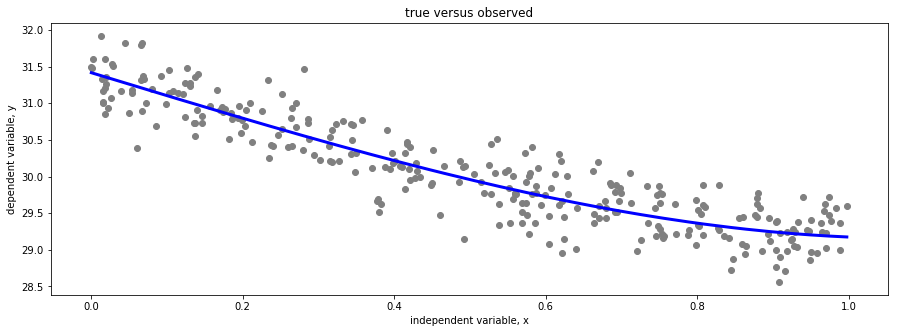

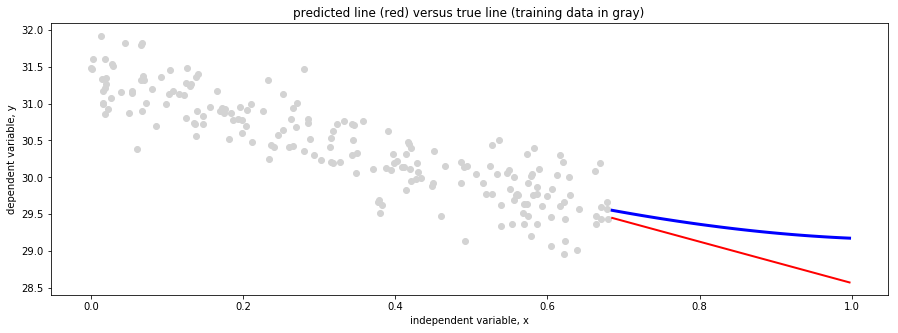

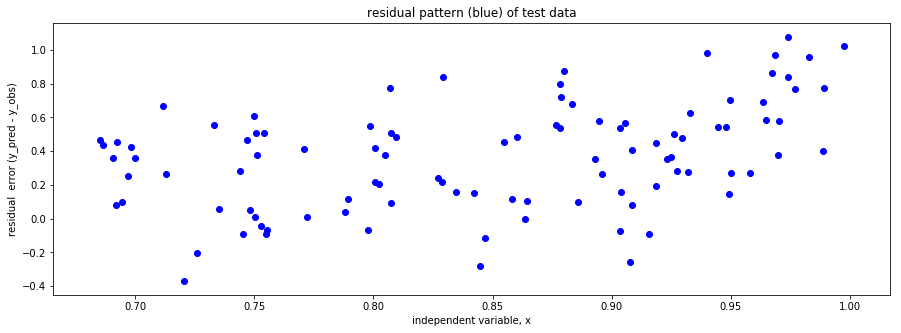

In [19]:
# choose the 'true' model parameters:
slope = -3.14159
intercept = 31.41592

# generate a synthetic data set
num_points = 300  # number of synthetic data points
seed = 1             #  set seed for random number generation 
np.random.seed(seed) # (this allows for reproducability)

# uniform random draw a set of independent variable values
x = np.sort(np.random.rand(num_points))
# compute the true values of the dependent variable
y_true = np.add(slope*x, 0.9*x**3) + intercept        # <------------- NB! difference!
# a new, correlated noise signal (with a nonlinear dependency on x):
noise_signal = np.random.normal(loc=0.0, scale=0.3, size=num_points) 
# the set of observed values have a noise component 
y_obs = np.add(y_true, noise_signal)

df = pd.DataFrame(data = {'x':x, 'y_true':y_true, 'y_obs':y_obs})
# take a look at the scatter
layout = {
    'title': 'true versus observed',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'dependent variable, y',
        #'range': [min_y, max_y]
        },
    'showlegend': True
}

figure = {
    'data': [
        {
            'name': "observed datapoints",
            'mode': 'markers',
            'x': df.x,
            'y': df.y_obs,
            'line': {'color': "rgb(150, 150, 150)"}
        },
        {
            'name': "true line",
            'mode': 'lines',
            'x': df.x,
            'y': df.y_true,
            'line': {'color': "rgb(0, 0, 255)",
                     'width': 3}
        },
    ],
    'layout': layout
}

iplot(figure)

# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df.x, df.y_obs,  color='gray')
plt.plot(df.x, df.y_true, color='blue', linewidth=3)
plt.title('true versus observed')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');
test_ratio = 3 # hold back a third of the data set for test
num_testing = int(num_points/test_ratio) # number of training points
num_training = num_points - num_testing
print('splitting initial data into two:', num_training, 'training points and', num_testing, 'test points')
df_training = df.head(num_training) 
df_testing = df.tail(num_testing)
# create a new linear regression object
regr = linear_model.LinearRegression(fit_intercept=True,)
# we need to prep the data set for 
numpy_array_x = np.array(df_training.x).reshape(-1,1)
numpy_array_y = np.array(df_training.y_obs).reshape(-1,1)

# use the fit method of regression object to fit the training set
line_fit  = regression_model.fit(numpy_array_x, numpy_array_y)
estimated_slope = line_fit.coef_[0][0]
estimated_intercept = regression_model.intercept_[0]
print('the estimated slope of the line is', 
      estimated_slope, 
      'and the difference from the true value is', 
      slope - estimated_slope, 
      '(', (slope - estimated_slope)/slope*100, '%)')
print('the estimated intercept of the line is', 
      estimated_intercept, 
      'and the difference from the true value is', 
      intercept - estimated_intercept, 
      '(', (intercept - estimated_intercept)/intercept*100, '%)')
numpy_array_x_test = np.array(df_testing.x).reshape(-1,1)
y_predict_test = regression_model.predict(numpy_array_x_test)
# update the testing data frame
df_testing = df_testing.assign(predicted=pd.Series([value[0] for value in y_predict_test]).values)
df_testing = df_testing.assign(residuals=(df_testing.y_obs - df_testing.predicted).values)
# plot command
plt.figure(figsize=(15,5))
plt.scatter(df_training.x, df_training.y_obs,  color='lightgray')
#plt.scatter(df_testing.x, df_testing.y_obs,  color='lightgray')
plt.plot(df_testing.x, y_predict_test,  color='red', linewidth=2)
plt.plot(df_testing.x, df_testing.y_true, color='blue', linewidth=3)
plt.title('predicted line (red) versus true line (training data in gray)')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');

numpy_array_y_test = np.array(df_testing.y_obs).reshape(-1,1)
print("mean squared error: %.2f" % mean_squared_error(numpy_array_y_test, y_predict_test))
# ratio of variance explained by model (variance score): 1 is perfect prediction
print('variance score: %.2f' % r2_score(numpy_array_y_test, y_predict_test))
# take a look at the residuals scatter. is there a pattern here? is the noise truly random or systemic?
layout = {
    'title': 'residual pattern (blue) of test data',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'residual  error (y_pred - y_obs)',
        #'range': [min_y, max_y]
        },
    'showlegend': False
}

figure = {
    'data': [
        {
            'name': "residuals",
            'mode': 'markers',
            'x': df_testing.x,
            'y': df_testing.residuals,
            'line': {'color': "rgb(0, 0, 255)"}
        },
    ],
    'layout': layout
}
iplot(figure)

# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df_testing.x, df_testing.residuals, color='blue')
plt.title('residual pattern (blue) of test data')
plt.xlabel('independent variable, x')
plt.ylabel('residual  error (y_pred - y_obs)');

# generate new noisy data 

In [23]:
output_file='exercise_11_data.csv'
# choose the 'true' model parameters:
slopes =[-5.7, 9.9]
intercepts = [80,-12]

# generate a synthetic data set
num_points = 300  # number of synthetic data points
seed = 1             #  set seed for random number generation 
np.random.seed(seed) # (this allows for reproducability)

# uniform random draw a set of independent variable values
#x = np.random.rand(num_points,1).reshape(-1,1)
x = np.random.rand(num_points)
# compute the true values of the dependent variable
y_true_1 = slopes[0]*x + 0.9*x**4 + intercepts[0]
y_true_2 = slopes[1]*x + intercepts[1]
# normally distributed random noise signal:
noise_signal_1 = np.random.normal(loc=0.0, scale=0.5, size=num_points) 
noise_signal_2 = np.random.normal(loc=1.0, scale=1.0, size=num_points) 
# the set of observed values have a noise component 
y_obs_1 = np.add(y_true_1, noise_signal_1)
y_obs_2 = np.add(y_true_2, noise_signal_2)
df = pd.DataFrame(data = {'x':x, 'y_true_1':y_true_1, 'y_obs_1':y_obs_1, 'y_true_2':y_true_2, 'y_obs_2':y_obs_2})
df = pd.DataFrame(data = {'x':x, 'y_obs_1':y_obs_1, 'y_obs_2':y_obs_2})
df.to_csv(output_file)

test_ratio = 3 # hold back a third of the data set for test
num_testing = int(num_points/test_ratio) # number of training points
num_training = num_points - num_testing
print('splitting initial data into two:', num_training, 'training points and', num_testing, 'test points')
df_training = df.head(num_training) 
df_testing = df.tail(num_testing)

splitting initial data into two: 200 training points and 100 test points


the estimated slope of the line is -5.158023450486296 and the difference from the true value is -0.5419765495137039 ( 9.50836051778428 %)
the estimated intercept of the line is 79.91007832148746 and the difference from the true value is 0.08992167851253896 ( 0.1124020981406737 %)
mean squared error: 0.24
variance score: 0.88


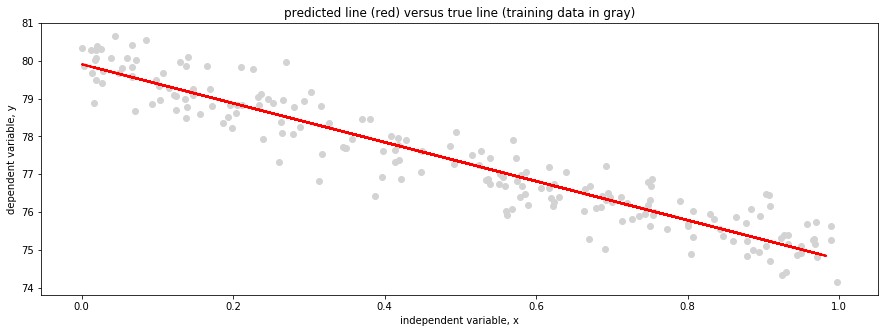

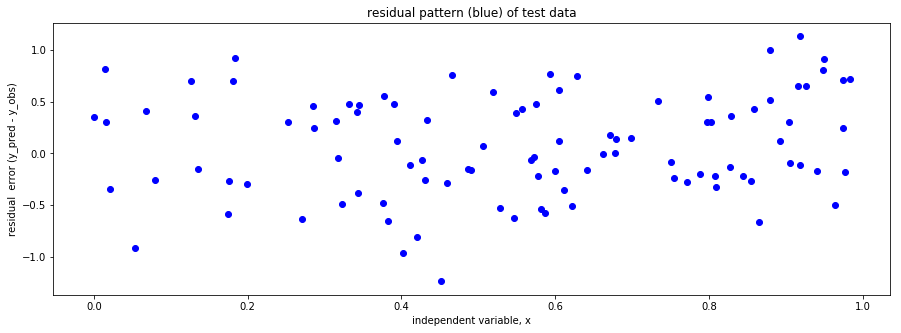

In [24]:
################# obs_1  #################
# create a new linear regression object
regr = linear_model.LinearRegression(fit_intercept=True,)
# we need to prep the data set for 
numpy_array_x = np.array(df_training.x).reshape(-1,1)
numpy_array_y = np.array(df_training.y_obs_1).reshape(-1,1)

# use the fit method of regression object to fit the training set
line_fit  = regression_model.fit(numpy_array_x, numpy_array_y)
estimated_slope = line_fit.coef_[0][0]
estimated_intercept = regression_model.intercept_[0]
print('the estimated slope of the line is', 
      estimated_slope, 
      'and the difference from the true value is', 
      slopes[0] - estimated_slope, 
      '(', (slopes[0] - estimated_slope)/slopes[0]*100, '%)')
print('the estimated intercept of the line is', 
      estimated_intercept, 
      'and the difference from the true value is', 
      intercepts[0] - estimated_intercept, 
      '(', (intercepts[0] - estimated_intercept)/intercepts[0]*100, '%)')
numpy_array_x_test = np.array(df_testing.x).reshape(-1,1)
y_predict_test = regression_model.predict(numpy_array_x_test)
# update the testing data frame
df_testing = df_testing.assign(predicted=pd.Series([value[0] for value in y_predict_test]).values)
df_testing = df_testing.assign(residuals=(df_testing.y_obs_1 - df_testing.predicted).values)

# plot training data and resulting straight line fit
plt.figure(figsize=(15,5))
plt.scatter(df_training.x, df_training.y_obs_1,  color='lightgray')
plt.plot(df_testing.x, y_predict_test,  color='red', linewidth=2)
#plt.plot(df_testing.x, df_testing.y_true, color='blue', linewidth=3)
plt.title('predicted line (red) versus true line (training data in gray)')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');

numpy_array_y_test = np.array(df_testing.y_obs_1).reshape(-1,1)
print("mean squared error: %.2f" % mean_squared_error(numpy_array_y_test, y_predict_test))
# ratio of variance explained by model (variance score): 1 is perfect prediction
print('variance score: %.2f' % r2_score(numpy_array_y_test, y_predict_test))
# take a look at the residuals scatter. is there a pattern here? is the noise truly random or systemic?
layout = {
    'title': 'residual pattern (blue) of test data',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'residual  error (y_pred - y_obs)',
        },
    'showlegend': False
}

figure = {
    'data': [
        {
            'name': "residuals",
            'mode': 'markers',
            'x': df_testing.x,
            'y': df_testing.residuals,
            'line': {'color': "rgb(0, 0, 255)"}
        },
    ],
    'layout': layout
}
iplot(figure)

# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df_testing.x, df_testing.residuals, color='blue')
plt.title('residual pattern (blue) of test data')
plt.xlabel('independent variable, x')
plt.ylabel('residual  error (y_pred - y_obs)');

the estimated slope of the line is 9.58229087176004 and the difference from the true value is 0.3177091282399598 ( 3.209183113534947 %)
the estimated intercept of the line is -10.852881963232619 and the difference from the true value is -1.147118036767381 ( 9.55931697306151 %)
mean squared error: 1.01
variance score: 0.88


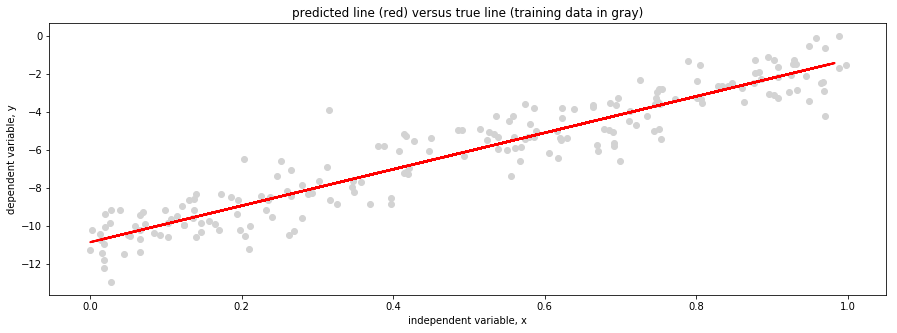

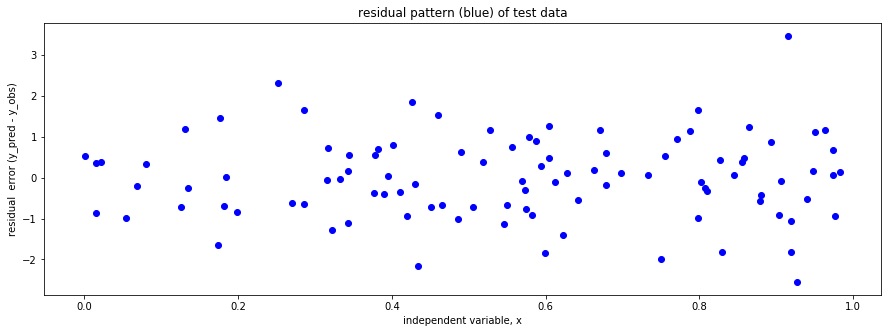

In [25]:
################# obs_2  #################
# create a new linear regression object
regr = linear_model.LinearRegression(fit_intercept=True,)
# we need to prep the data set for 
numpy_array_x = np.array(df_training.x).reshape(-1,1)
numpy_array_y = np.array(df_training.y_obs_2).reshape(-1,1)

# use the fit method of regression object to fit the training set
line_fit  = regr.fit(numpy_array_x, numpy_array_y)
estimated_slope = line_fit.coef_[0][0]
estimated_intercept = regr.intercept_[0]
print('the estimated slope of the line is', 
      estimated_slope, 
      'and the difference from the true value is', 
      slopes[1] - estimated_slope, 
      '(', (slopes[1] - estimated_slope)/slopes[1]*100, '%)')
print('the estimated intercept of the line is', 
      estimated_intercept, 
      'and the difference from the true value is', 
      intercepts[1] - estimated_intercept, 
      '(', (intercepts[1] - estimated_intercept)/intercepts[1]*100, '%)')
numpy_array_x_test = np.array(df_testing.x).reshape(-1,1)
y_predict_test = regr.predict(numpy_array_x_test)
# update the testing data frame
df_testing = df_testing.assign(predicted=pd.Series([value[0] for value in y_predict_test]).values)
df_testing = df_testing.assign(residuals=(df_testing.y_obs_2 - df_testing.predicted).values)

# plot training data and resulting straight line fit
plt.figure(figsize=(15,5))
plt.scatter(df_training.x, df_training.y_obs_2,  color='lightgray')
plt.plot(df_testing.x, y_predict_test,  color='red', linewidth=2)
#plt.plot(df_testing.x, df_testing.y_true, color='blue', linewidth=3)
plt.title('predicted line (red) versus true line (training data in gray)')
plt.xlabel('independent variable, x')
plt.ylabel('dependent variable, y');

numpy_array_y_test = np.array(df_testing.y_obs_2).reshape(-1,1)
print("mean squared error: %.2f" % mean_squared_error(numpy_array_y_test, y_predict_test))
# ratio of variance explained by model (variance score): 1 is perfect prediction
print('variance score: %.2f' % r2_score(numpy_array_y_test, y_predict_test))
# take a look at the residuals scatter. is there a pattern here? is the noise truly random or systemic?
layout = {
    'title': 'residual pattern (blue) of test data',
    'xaxis': {
        'title': 'independent variable, x',
        },
    'yaxis': {
        'title': 'residual  error (y_pred - y_obs)',
        },
    'showlegend': False
}

figure = {
    'data': [
        {
            'name': "residuals",
            'mode': 'markers',
            'x': df_testing.x,
            'y': df_testing.residuals,
            'line': {'color': "rgb(0, 0, 255)"}
        },
    ],
    'layout': layout
}
iplot(figure)

# alternate plot command
plt.figure(figsize=(15,5))
plt.scatter(df_testing.x, df_testing.residuals, color='blue')
plt.title('residual pattern (blue) of test data')
plt.xlabel('independent variable, x')
plt.ylabel('residual  error (y_pred - y_obs)');
